# Exercise 2: Creating and working with structure databases

Before the excercise, you should:

* Run the 01_Introduction_Pyiron.ipynb notebook

The aim of this exercise is to make you familiar with:

* Creating structure databases and working with them for potential fitting (day 2)

## Importing necessary modules and creating a project

This is done the same way as shown in the first exercise

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import os

In [2]:
from pyiron import Project

/srv/conda/envs/notebook/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: NOT-A-GIT-REPOSITORY is an invalid version and will not be supported in a future release
  warnings.warn(


In [3]:
pr = Project("creating_datasets")

## Creating a structure "container" from the data

We now go over the jobs generated in the first notebook to store structures, energies, and forces into a structure container which will later be used for potential fitting

**Note**: Usually these datasets are created using highly accurate DFT calculations. But for practical reasons, we only demonstrate how to do this using data from LAMMPS calculations (the workflow remain the same)

Access the project created in exercise 1.  `..` means go up one folder in the directory tree as usual in linux.

In [4]:
pr_fs = pr["../first_steps"]

Create a TrainingContainer job (to store structures and databases).

In [9]:
container = pr.create.job.TrainingContainer('dataset_example')

## Add structures from the E-V curves

For starters, we append structures from the energy volume curves we calculated earlier

In [10]:
for job in pr_fs["E_V_curve"].iter_jobs(status="finished"):
    container.include_job(job)

  0%|          | 0/7 [00:00<?, ?it/s]

We can obtain this data as a `pandas` table

In [11]:
container.to_pandas()

,name,atoms,energy,forces,stress,number_of_atoms
0,job_a_3_8,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.192897,"[[1.6276043110675176e-16, 1.0529105848988852e-16, 5.1718187378489436e-17]]","[25.037460604415703, 25.037460605376904, 25.037460604885503, 9.278150850360161e-10, 9.583505518476542e-10, -6.776540272768861e-10]",1
1,job_a_3_9,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.319542,"[[7.639186604470381e-18, 1.2897999183801795e-17, 6.560662375038692e-17]]","[11.7835809621756, 11.783580962894401, 11.783580964499402, -2.9210890660206204e-11, 4.5548187747551897e-10, -3.2208895273694305e-10]",1
2,job_a_4_0,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.367063,"[[-3.5024524628727396e-17, -1.320930466294525e-17, 5.849496262865055e-18]]","[2.1774865934278202, 2.17748659599896, 2.1774865953501803, -1.2204712117387501e-11, 8.04195020225017e-10, 1.13730200248357e-09]",1
3,job_a_4_1,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.360600,"[[-2.2377622695133157e-17, -4.0689075283847526e-17, 2.1062919550300275e-17]]","[-3.32656345373484, -3.32656345287999, -3.32656345199962, 1.44346086248294e-10, 2.68736816186093e-10, 3.8004542651085804e-10]",1
4,job_a_4_2,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.317017,"[[2.1405562304448044e-17, 9.465137265930533e-17, -1.614674972511662e-17]]","[-7.34400540416366, -7.344005404000251, -7.3440054020844014, 5.444172612856411e-10, 9.032537237010151e-10, -6.38697915161281e-10]",1
5,job_a_4_3,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.241535,"[[-5.0018187940959333e-17, -7.753256254350387e-17, -7.947668332487412e-17]]","[-10.206225127542101, -10.2062251265863, -10.2062251275071, 2.3284396085851003e-10, 2.69898641821963e-10, 3.8169349934623504e-10]",1
6,job_a_4_4,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.145751,"[[-7.31320096256601e-17, 2.773206044106321e-16, -1.2031135854225408e-16]]","[-11.0438299224574, -11.0438299224868, -11.0438299224679, -5.24346994489793e-11, -2.1255620053309103e-11, 1.50307693032171e-11]",1


## Add structures from the MD

We also add some structures obtained from the MD simulations

Reloading the MD job.  Indexing a project loads jobs within.

In [12]:
job_md = pr_fs["lammps_job"]

We can now iterate over the structures within and add each of them to the container.

In [13]:
traj_length = job_md.number_of_structures
stride = 10

By default include_job will fetch the last computation step from the given job
for other steps you have to explicitly pass which step you want.

In [14]:
for i in range(0, traj_length, stride):
    container.include_job(job_md, iteration_step=i)

## Add some defect structures (vacancies, surfaces, etc)

It's necessary to also include some defect structures, and surfaces to the training dataset.

Setup a MD calculation for a structure with a vacancy.

In [15]:
job_lammps = pr.create.job.Lammps("lammps_job_vac")
job_lammps.structure = pr.create.structure.bulk("Al", cubic=True, a=3.61).repeat([3, 3, 3])

remove the first atom of the structure to create the vacancy

In [16]:
del job_lammps.structure[0]
job_lammps.potential = "2005--Mendelev-M-I--Al-Fe--LAMMPS--ipr1"
job_lammps.calc_md(temperature=800, pressure=0, n_ionic_steps=10000)
job_lammps.run()

2023-03-21 16:54:04,186 - pyiron_log - WARNING - The job lammps_job_vac is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


Setup a MD calculation for a surface structure.  This function follows the ASE interface to create surfaces.

In [17]:
job_lammps = pr.create.job.Lammps("lammps_job_surf")
job_lammps.structure = pr.create.structure.surface("Al", surface_type="fcc111", size=(4, 4, 8), vacuum=12, orthogonal=True)
job_lammps.potential = "2005--Mendelev-M-I--Al-Fe--LAMMPS--ipr1"
job_lammps.calc_md(temperature=800, pressure=0, n_ionic_steps=10000)
job_lammps.run()

2023-03-21 16:54:05,603 - pyiron_log - WARNING - The job lammps_job_surf is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [14]:
pr

{'groups': [], 'nodes': ['lammps_job_vac', 'lammps_job_surf']}

We now add these structures to the dataset like we did before.

In [18]:
for job_md in pr.iter_jobs(status="finished", hamilton="Lammps"):
    stride = 10
    for i in range(0, job.number_of_structures, stride):
        container.include_job(job_md, iteration_step=i)

  0%|          | 0/2 [00:00<?, ?it/s]

We run the job to store this dataset in the pyiron database.  Without running the training container "job" the data will **not** saved!

In [19]:
container.run()

The job dataset_example was saved and received the ID: 57


In [20]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,51,finished,Al107,lammps_job_vac,/lammps_job_vac,None,/home/joyvan/potentials/introduction/creating_datasets/,2023-03-17 12:05:20.160750,2023-03-17 12:05:23.753826,3.0,pyiron@jupyter-poul#1,Lammps,0.1,None,None
1,52,finished,Al128,lammps_job_surf,/lammps_job_surf,None,/home/joyvan/potentials/introduction/creating_datasets/,2023-03-17 12:05:24.161941,2023-03-17 12:05:27.544571,3.0,pyiron@jupyter-poul#1,Lammps,0.1,None,None
2,57,finished,None,dataset_example,/dataset_example,None,/home/joyvan/potentials/introduction/creating_datasets/,2023-03-21 16:54:33.226455,NaT,NaN,pyiron@jupyter-poul#1,TrainingContainer,0.4,None,None


## Reloading the dataset

This dataset can now be reloaded anywhere to use in the potential fitting procedures

In [21]:
dataset = pr["dataset_example"]
dataset.to_pandas()

,name,atoms,energy,forces,stress,number_of_atoms
0,job_a_3_8,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.192897,"[[1.6276043110675176e-16, 1.0529105848988852e-16, 5.1718187378489436e-17]]","[25.037460604415703, 25.037460605376904, 25.037460604885503, 9.278150850360161e-10, 9.583505518476542e-10, -6.776540272768861e-10]",1
1,job_a_3_9,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.319542,"[[7.639186604470381e-18, 1.2897999183801795e-17, 6.560662375038692e-17]]","[11.7835809621756, 11.783580962894401, 11.783580964499402, -2.9210890660206204e-11, 4.5548187747551897e-10, -3.2208895273694305e-10]",1
2,job_a_4_0,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.367063,"[[-3.5024524628727396e-17, -1.320930466294525e-17, 5.849496262865055e-18]]","[2.1774865934278202, 2.17748659599896, 2.1774865953501803, -1.2204712117387501e-11, 8.04195020225017e-10, 1.13730200248357e-09]",1
3,job_a_4_1,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.360600,"[[-2.2377622695133157e-17, -4.0689075283847526e-17, 2.1062919550300275e-17]]","[-3.32656345373484, -3.32656345287999, -3.32656345199962, 1.44346086248294e-10, 2.68736816186093e-10, 3.8004542651085804e-10]",1
4,job_a_4_2,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.317017,"[[2.1405562304448044e-17, 9.465137265930533e-17, -1.614674972511662e-17]]","[-7.34400540416366, -7.344005404000251, -7.3440054020844014, 5.444172612856411e-10, 9.032537237010151e-10, -6.38697915161281e-10]",1
5,job_a_4_3,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.241535,"[[-5.0018187940959333e-17, -7.753256254350387e-17, -7.947668332487412e-17]]","[-10.206225127542101, -10.2062251265863, -10.2062251275071, 2.3284396085851003e-10, 2.69898641821963e-10, 3.8169349934623504e-10]",1
6,job_a_4_4,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-3.145751,"[[-7.31320096256601e-17, 2.773206044106321e-16, -1.2031135854225408e-16]]","[-11.0438299224574, -11.0438299224868, -11.0438299224679, -5.24346994489793e-11, -2.1255620053309103e-11, 1.50307693032171e-11]",1
7,lammps_job,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-363.917370,"[[5.8841820305133305e-15, 3.7990444123892135e-16, 2.740863092043364e-16], [5.02375918642883e-15, -1.5751289161869397e-15, -1.3274971399912499e-15], [1.02695629777827e-15, 8.812395257962181e-16, -8...","[0.999556665124294, 0.9904736758167861, 0.824951894171107, -0.017955018197828142, 0.06363360519613635, -0.04256361660396504]",108
8,lammps_job,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-352.327898,"[[-0.75036385499113, 0.4598380918639449, 0.725200216845603], [-0.271732166045788, 0.302073802280348, 0.257384300490495], [0.448407157614891, -0.296549448310268, 0.241166662468148], [-0.00933123696...","[-0.20333593198685002, -0.0514950077978542, -0.380336649881006, -0.192008378726288, -0.0008491478026102756, -0.021247590027086812]",108
9,lammps_job,"[element: [None, AtomicNumber 13\nAtomicRadius 118.0\nAtomicMass 26.981539\nColor Silver\nCovalentRadius ...",-349.888834,"[[-0.380822550162949, 0.795020858927261, 0.552227922138795], [-0.815959874301847, -0.02386117799239805, -0.47623155209815404], [-0.286795110662345, 0.30418979949872, 0.970569998348215], [-0.550088...","[-0.636237386917572, -1.22215332293502, -0.718802458515107, 0.03341135510320849, -0.4677817561429891, -0.15083572558775005]",108


We can now inspect the data in this dataset quite easily

In [22]:
struct = dataset.get_structure(10)

In [23]:
struct.plot3d()

NGLWidget()

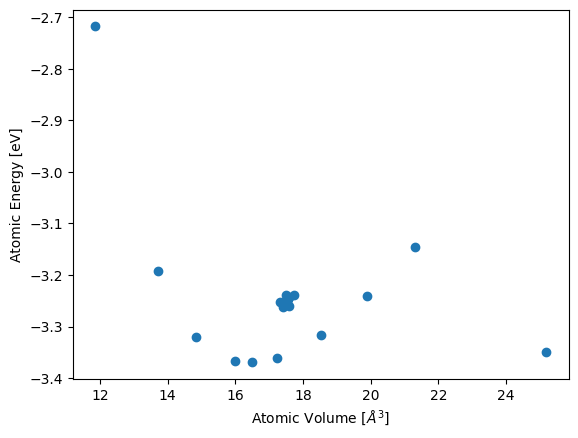

In [24]:
dataset.plot.energy_volume();

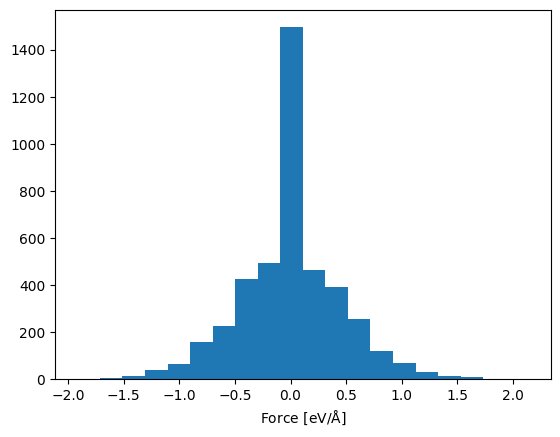

In [22]:
dataset.plot.forces()

The datasets used in the potential fitting procedure for day 2 (obtained from accurate DFT calculations) will be accessed in the same way.

## Extra Credit

1. Add more interesting structures. Ideas:
    - Dimer, trimers
    - Cleaving of a bulk structure, i.e. create a super cell and separate the atoms along a chosen plane
    - high or low pressure MD
    - Different crystal structures
    - ...